In [ ]:
! pip install bio

In [2]:
from Bio.PDB.PDBParser import PDBParser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from xlrd.formula import colname
df = pd.read_excel('PPComplexes_pKD.xlsx', index_col=0, header=1)
df

,PDB code,Subset,Complex Type,Resolution,Affinity Data,pKd pKi pIC50,Release Year,Protein Name,Ligand Name,Pubmed ID,...,Exact Mass,No. of atoms,No. of bonds,Polar Surface Area,XLOGP3,open banel LogP,HB donor,HB acceptor,Rotatable bonds,Canonical SMILES
ID,,,,,,,,,,,,,,,,,,,,,
1,1a22,general,Protein-Protein,2.6,Kd=0.34nM,9.47,1998,GROWTH HORMONE RECEPTOR,G120R mutant human growth hormone (hGH),9571026.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5bxq,general,Protein-Protein,2.5,Kd=150nM,6.82,1998,Ran GTPase,Nuclear Transport Factor 2,9533885.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1a3b,general,Protein-Protein,1.8,Kd=0.3nM,9.52,1998,thrombin alpha,21-mer,8272424.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1a4y,general,Protein-Protein,2,Ki=1fM,15.00,1998,ANGIOGENIN,RIBONUCLEASE INHIBITOR,9311977.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1acb,general,Protein-Protein,2,Kd=0.2nM,9.70,1993,bovine alpha-chymotrypsin,leech (Hirudo medicinalis) protein proteinase ...,3071573.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2847,6um5,general,Protein-Protein,4.2,Kd=532nM,6.27,2019,CH848 10.17DT Env,HIV-1 neutralizing antibody DH270 UCA3,31806786.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2848,6umt,general,Protein-Protein,1.99,Kd=2.6nM,8.59,2019,"Programmed cell death protein 1, human PD-1 (N...","Programmed cell death 1 ligand 2, PD-L2 IgV",31727844.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2849,6uvo,general,Protein-Protein,2.9,Kd=579pM,9.24,2019,"RSV G central conserved domain, RSV G (157-197)",broadly neutralizing human monoclonal antibody...,31852779.0,...,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Распределение целевого значения

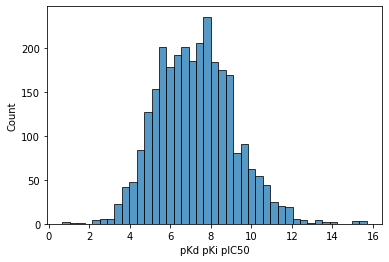

In [4]:
sns_plot = sns.histplot(df['pKd pKi pIC50'])
fig = sns_plot.get_figure()

In [5]:
from Bio.PDB import PDBList
pdbl = PDBList()
PDB_str = df['PDB code']
#pdbl.retrieve_pdb_file(PDB_str,pdir='PDB', file_format='pdb')

In [ ]:
pdbl.download_pdb_files(PDB_str, pdir='PDB', file_format='pdb')

In [ ]:
struct_many_chains = pd.DataFrame(columns=['pdb_id', 'number_chain', 'protein_1', 'protein_2'])
for i in range(1, len(PDB_str)+1):

  parser = PDBParser()
  pdb = f'PDB/pdb{PDB_str[i]}.ent'
  structure = parser.get_structure(f'{PDB_str[i]}', pdb)
  if len(structure.header['compound']) > 2:
    struct_many_chains.loc[len(struct_many_chains.index)] = [PDB_str[i], len(structure.header['compound']), 'NaN', 'NaN']

In [9]:
struct_many_chains

,pdb_id,number_chain,protein_1,protein_2
0,1a3b,3,NaN,NaN
1,1ahw,3,NaN,NaN
2,1akj,4,NaN,NaN
3,1avg,3,NaN,NaN
4,1bj1,3,NaN,NaN
...,...,...,...,...
986,6tzc,3,NaN,NaN
987,6u8c,3,NaN,NaN
988,6uda,4,NaN,NaN
989,6um5,4,NaN,NaN


In [10]:
struct_many_chains.to_csv('Complexes_chains.csv')

In [37]:
from Bio.PDB import PDBList
pdbl = PDBList()
PDB_str = df['PDB code']
pdbl.retrieve_pdb_file(PDB_str[1], pdir='PDB')

'PDB/1avx.cif'

In [56]:
from Bio.PDB.MMCIFParser import MMCIFParser
from Bio.PDB import PDBParser, PDBIO, Select


parser = MMCIFParser()
pdb = f'PDB/{PDB_str[1]}.cif'
structure = parser.get_structure(f'{PDB_str[1]}', pdb)


/usr/local/lib/python3.8/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 3044.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 3070.
  warnings.warn(


In [57]:
Atoms_coord_df = pd.DataFrame(columns=['Chain_name', 'Chain_num', 'Type', 'x', 'y', 'z']) 
chains = structure[0].get_chains()
num_chain = 0
for chain in chains:
  ch_id = chain.get_id()
  atoms = chain.get_atoms()
  num_chain+=1
  for atom in atoms:
    coord_atom = atom.get_coord()
    name_atom = atom.get_name()
    if atom.get_full_id()[3][0] == ' ':
      Atoms_coord_df.loc[len(Atoms_coord_df.index)] = [ch_id, num_chain-1, name_atom, round(coord_atom[0]), round(coord_atom[1]), round(coord_atom[2])]




In [58]:
Atoms_coord_df

,Chain_name,Chain_num,Type,x,y,z
0,A,0,N,73,31,101
1,A,0,CA,72,30,101
2,A,0,C,71,31,102
3,A,0,O,71,31,104
4,A,0,CB,73,29,101
...,...,...,...,...,...,...
3039,B,1,CA,13,51,110
3040,B,1,C,12,50,109
3041,B,1,O,13,49,108
3042,B,1,CB,13,52,110


In [59]:
max_x = max(Atoms_coord_df['x'])
max_y = max(Atoms_coord_df['y'])
max_z = max(Atoms_coord_df['z'])
coord_array = np.zeros((2, max_x+10, max_y+10, max_z+10))

In [60]:
coord_array.shape

(2, 90, 66, 180)

In [61]:
for a in range(Atoms_coord_df.shape[0]):
  coord_array[Atoms_coord_df['Chain_num'][a]][Atoms_coord_df['x'][a]][Atoms_coord_df['y'][a]][Atoms_coord_df['z'][a]] = 1

<ipython-input-62-61175f2a24a9>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


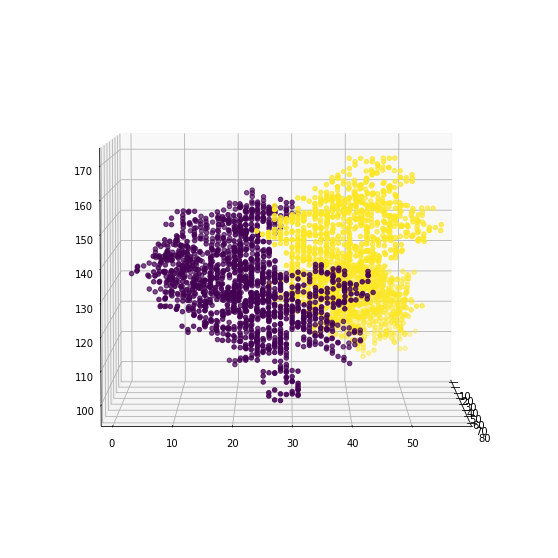

In [62]:
fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection="3d")

sct = ax.scatter3D(Atoms_coord_df['x'], Atoms_coord_df['y'], Atoms_coord_df['z'], c = Atoms_coord_df['Chain_num'])
ax.view_init(5, 0)
plt.show()

In [63]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression()
logreg_clf.fit(Atoms_coord_df[['x', 'y', 'z']].values, Atoms_coord_df['Chain_num'].astype('int'))

LogisticRegression()

In [64]:
logreg_clf.coef_[0]

array([-0.15713091,  0.41027537,  0.13870038])

<ipython-input-67-9efec3b6cdde>:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


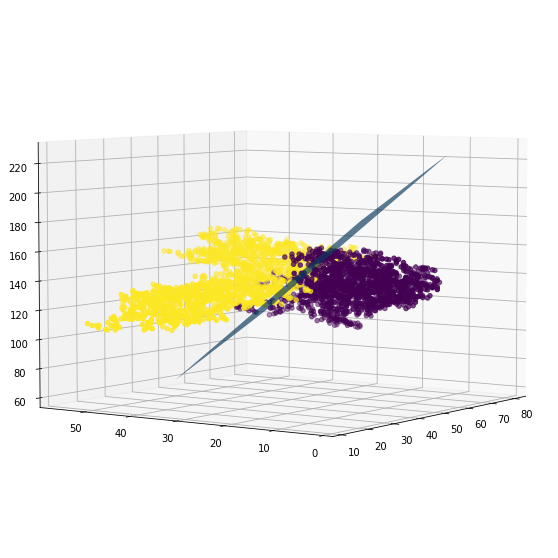

In [67]:
z = lambda x,y: (-logreg_clf.intercept_[0]-logreg_clf.coef_[0][0]*x-logreg_clf.coef_[0][1]*y) / logreg_clf.coef_[0][2]
tmp_y = np.linspace(10, 50, 100)
tmp_x = np.linspace(40, 75, 100)
#tmp_y = np.linspace(30, 60, 100)
#tmp_x = np.linspace(0, 30, 100)
x,y = np.meshgrid(tmp_x,tmp_y)

fig = plt.figure(figsize=(16, 10))
ax = fig.gca(projection="3d")

ax.plot_surface(x, y, z(x,y))
sct = ax.scatter3D(Atoms_coord_df['x'], Atoms_coord_df['y'], Atoms_coord_df['z'], c = Atoms_coord_df['Chain_num'])
ax.view_init(5, -145)
plt.show()